In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

In [2]:
Bearing_Data_Expanded = pd.read_csv('Bearing_Expanded_Dataset.csv')
Bearing_Data_Expanded['Misaligned'] = Bearing_Data_Expanded['Misaligned'].astype(int)

In [3]:
## KNN

In [4]:
## Data standardization

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(Bearing_Data_Expanded.drop('Misaligned',axis=1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(Bearing_Data_Expanded.drop('Misaligned',axis=1))

In [10]:
bearraw_feat = pd.DataFrame(scaled_features,columns=Bearing_Data_Expanded.columns[:-1])
bearraw_feat.head()

,f,e,hmin0,hminL,PSIx th,PSIy th,D0 th
0,2.322770,0.176959,0.188081,0.493080,-0.013764,-0.079714,0.032393
1,2.322931,0.176923,0.196801,0.476116,-0.013764,-0.045239,0.032393
2,2.322155,0.176847,0.205486,0.459136,-0.013764,-0.010765,0.032393
3,2.320441,0.176732,0.214115,0.442162,-0.013764,0.023710,0.032393
4,2.317785,0.176578,0.222656,0.425207,-0.013764,0.058185,0.032393


In [11]:
## Train - Test split

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,Bearing_Data_Expanded['Misaligned'],test_size=0.30)

In [15]:
## Using KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=6)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [19]:
pred = knn.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

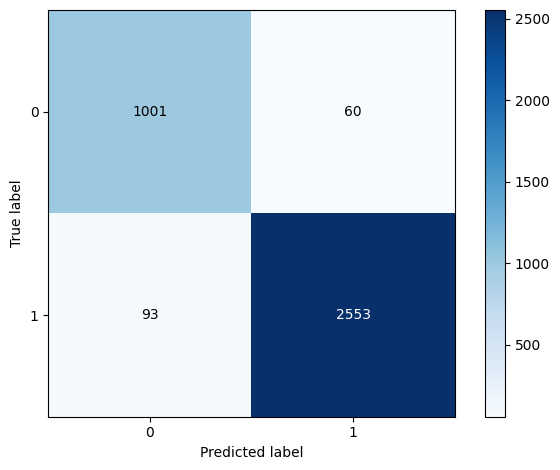

In [23]:
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['0', '1'], yticklabels=['0', '1'],
       xlabel='Predicted label', ylabel='True label')
ax.set_ylim(len(cm) - 0.5, -0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [25]:
target_names = ['Aligned', 'Misaligned']
report = classification_report(y_test, pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

     Aligned       0.91      0.94      0.93      1061
  Misaligned       0.98      0.96      0.97      2646

    accuracy                           0.96      3707
   macro avg       0.95      0.95      0.95      3707
weighted avg       0.96      0.96      0.96      3707



In [26]:
## Choosing K value

In [27]:
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

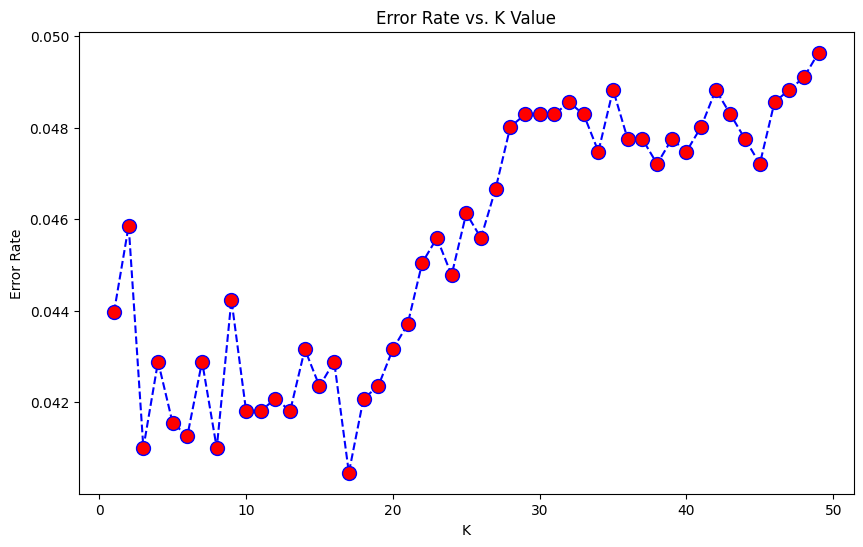

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

WITH K=18




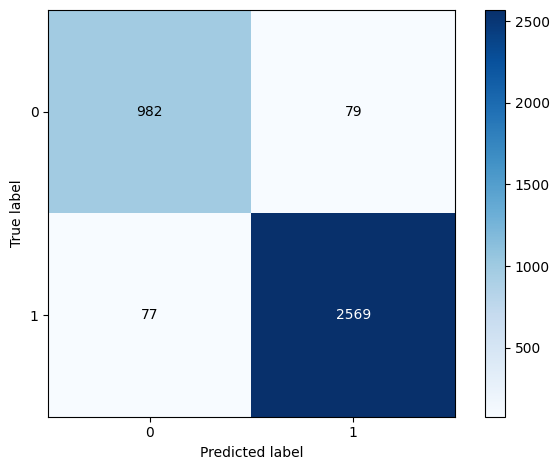



              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1061
           1       0.97      0.97      0.97      2646

    accuracy                           0.96      3707
   macro avg       0.95      0.95      0.95      3707
weighted avg       0.96      0.96      0.96      3707



In [31]:
## For k=18
knn = KNeighborsClassifier(n_neighbors=18)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=18')
print('\n')

cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['0', '1'], yticklabels=['0', '1'],
       xlabel='Predicted label', ylabel='True label')
ax.set_ylim(len(cm) - 0.5, -0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

print('\n')
print(classification_report(y_test,pred))